In [1]:
from glob import glob
import pandas as pd
import docx2txt
from win32com import client
import os
from docx import Document 
import PyPDF2
import textract
import spacy
import json
import re
from nltk.tokenize import TweetTokenizer
import string

In [2]:
# Assigning path based on the category
files1 = glob("D:\\dataScience\\projects\\NLP_RESUME_CLASIFICATION\\data_sets\\classified_Resumes\\Peoplesoft resumes\\*")
files2 = glob("D:\\dataScience\\projects\\NLP_RESUME_CLASIFICATION\\data_sets\\classified_Resumes\\React JS Developer\\*")
files3 = glob("D:\\dataScience\\projects\\NLP_RESUME_CLASIFICATION\\data_sets\\classified_Resumes\\SQL Developer Lightning insight\\*")
files4 = glob("D:\\dataScience\\projects\\NLP_RESUME_CLASIFICATION\\data_sets\\classified_Resumes\\workday resumes\\*")

In [3]:
# checking the lenth of the paths
print(len(files1))
print(len(files2))
print(len(files3))
print(len(files4))

20
24
14
21


In [4]:
# funtion for reading doc files
def docReader(doc_file_name): 
    ## 1) Initiate an object that interfaces to Word
    word = client.Dispatch("Word.Application")
    word.Visible = False 
    
    ## 2) Open the Word document to read in
    _ = word.Documents.Open(doc_file_name)

    ## 3) Extract the paragraphs and close the connections
    doc = word.ActiveDocument
    paras = doc.Range().text    
    doc.Close()
    word.Quit()
    return paras    

In [5]:
# Importing the data present in first file (People soft)
data1 = []
for i in range(len(files1)):
    if files1[i].endswith('docx'):
        x = docx2txt.process(files1[i])
        data1.append(x)
    if files1[i].endswith('doc'):
        y = docReader(files1[i])
        data1.append(y)
        [a for a in y.replace('\x07', '\r').split('\r') if a]
    if files1[i].endswith('pdf'):
        z = PyPDF2.PdfReader(files1[i])
        z1 = ''
        for j in range(len(z.pages)):
            m = z.pages[j].extract_text()
            z1 = z1 + m
        data1.append(z1)

In [6]:
len(data1)

20

In [7]:
data1 = pd.DataFrame(data=data1,columns=['data']) # converting to DataFrame

In [8]:
data1['category'] = 'Peoplesoft' # Creating column with column name category and assigning "peoplesoft" to every cell 

In [9]:
# Adding Name column and assinging name
name1 = []
for i in range(len(files1)):
    tem = files1[i].split('\\')
    name1.append(tem[-1])
names1 = []
for i in range(len(name1)):
    d = name1[i].split('.')
    names1.append(d[0])

In [10]:
names1 = pd.DataFrame(data = names1,columns=["Name"])

In [11]:
data1 = pd.concat([data1,names1],axis=1)

In [12]:
data1

,data,category,Name
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Peoplesoft Admin_AnubhavSingh
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu
2,PeopleSoft Database Administrator\r ...,Peoplesoft,Peoplesoft Admin_Gangareddy
3,Classification: Internal\n\nClassification: In...,Peoplesoft,Peoplesoft Admin_Murali
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,Peoplesoft Admin_SirazuddinMohammad
6,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft,Peoplesoft Admin_srinivasarao
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,Peoplesoft Admin_Varkala Vikas
8,Vinod Akkala ...,Peoplesoft,Peoplesoft Admin_Vinod Akkala
9,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft,PeopleSoft DBA_Ganesh Alladi


In [13]:
# Importing the data present in second file (React JS Developer)
data2 = []
for i in range(len(files2)):
    if files2[i].endswith('docx'):
        x = docx2txt.process(files2[i])
        data2.append(x)
    if files2[i].endswith('doc'):
        y = docReader(files2[i])
        data2.append(y)
        [a for a in y.replace('\x07', '\r').split('\r') if a]
    if files2[i].endswith('pdf'):
        z = PyPDF2.PdfReader(files2[i])
        z1 = ''
        for j in range(len(z.pages)):
            m = z.pages[j].extract_text()
            z1 = z1 + m
        data2.append(z1)

In [14]:
len(data2)

24

In [15]:
data2 = pd.DataFrame(data=data2,columns=['data'])

In [16]:
data2['category'] = 'React JS Developer' # Creating column with column name category and assigning "React JS Developer" to every cell 

In [17]:
# Adding Name column and assinging name
name2 = []
for i in range(len(files2)):
    tem = files2[i].split('\\')
    name2.append(tem[-1])
names2 = []
for i in range(len(name2)):
    d = name2[i].split('.')
    names2.append(d[0])
names2 = pd.DataFrame(data = names2,columns=["Name"])
data2 = pd.concat([data2,names2],axis=1)

In [18]:
data2

,data,category,Name
0,Name: Ravali P \n\n\n\n ...,React JS Developer,Internship_Ravali_Musquare Technologies (1)
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer,Internship_Susovan Bag_Musquare Technologies
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer,React Developer_Deepakreddy
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer,React Developer_Haripriya
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer,React Developer_Kamalakar Reddy
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer,React Developer_Naveen sadhu
6,\r\r PROFILE\rSearching for the opportunity ...,React JS Developer,React Developer_PavasGoswami
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer,React Developer_Pragnya
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer,React Developer_Sarala Madasu-converted
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer,React Developer_Thirupathiamma


In [19]:
# Importing the data present in third file (SQL Developer)
data3 = []
for i in range(len(files3)):
    if files3[i].endswith('docx'):
        x = docx2txt.process(files3[i])
        data3.append(x)
    if files3[i].endswith('doc'):
        y = docReader(files3[i])
        data3.append(y)
        [a for a in y.replace('\x07', '\r').split('\r') if a]
    if files3[i].endswith('pdf'):
        z = PyPDF2.PdfReader(files3[i])
        z1 = ''
        for j in range(len(z.pages)):
            m = z.pages[j].extract_text()
            z1 = z1 + m
        data3.append(z1)

In [20]:
len(data3)

14

In [21]:
data3 = pd.DataFrame(data=data3,columns=['data'])

In [22]:
data3['category'] = 'SQL Developer' # Creating column with column name category and assigning "SQL Developer" to every cell 

In [23]:
# Adding Name column and assinging name
name3 = []
for i in range(len(files3)):
    tem = files3[i].split('\\')
    name3.append(tem[-1])
names3 = []
for i in range(len(name3)):
    d = name3[i].split('.')
    names3.append(d[0])
names3 = pd.DataFrame(data = names3,columns=["Name"])
data3 = pd.concat([data3,names3],axis=1)

In [24]:
data3

,data,category,Name
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer,Anil kumar
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer,AradhanaTripathi[4_0]
2,BUDDHA VAMSI ...,SQL Developer,Buddha Vamsi
3,KAMBALLA PRADEEP ...,SQL Developer,kamballapradeep
4,\r\r Hyderabad\rNazeer Basha\rSQL and Power...,SQL Developer,Nazeer Basha
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer,Neeraj Mishra
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer,premsai
7,SQL SER...,SQL Developer,Priyanka L
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer,PSyamKumar[2_3]
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer,Rajupavanakumari[2_10]


In [25]:
# Importing the data present in 4th file (workday)
data4 = []
for i in range(len(files4)):
    if files4[i].endswith('docx'):
        x = docx2txt.process(files4[i])
        data4.append(x)
    if files4[i].endswith('doc'):
        y = docReader(files4[i])
        data4.append(y)
        [a for a in y.replace('\x07', '\r').split('\r') if a]
    if files4[i].endswith('pdf'):
        z = PyPDF2.PdfReader(files4[i])
        z1 = ''
        for j in range(len(z.pages)):
            m = z.pages[j].extract_text()
            z1 = z1 + m
        data4.append(z1)

In [26]:
len(data4)

21

In [27]:
data4 = pd.DataFrame(data=data4,columns=['data'])

In [28]:
data4['category'] = 'workday' # Creating column with column name category and assigning "workday" to every cell 

In [29]:
# Adding Name column and assinging name
name4 = []
for i in range(len(files4)):
    tem = files4[i].split('\\')
    name4.append(tem[-1])
names4 = []
for i in range(len(name4)):
    d = name4[i].split('.')
    names4.append(d[0])
names4 = pd.DataFrame(data = names4,columns=["Name"])
data4 = pd.concat([data4,names4],axis=1)

In [30]:
data4

,data,category,Name
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,ChinnaSubbarayuduM_Hexaware
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday,Gopi Krishna_Hexaware
2,Hari Krishna M\r\r\rSummary:\rA result oriente...,workday,Hari Krishna M_Hexaware
3,Harikrishna Akula ...,workday,Harikrishna Akula_Hexaware
4,HIMA.MENDU\r \r\rCareer Objective\rTo continu...,workday,Hima Mendu_Hexaware
5,G Himaja\n\n ...,workday,Himaja G_(Hexaware)
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...,workday,J
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,Jyotiverma_Heaware
8,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...,workday,Madeeswar A_Hexaware
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday,MooraboyinaGuravaiah_Hexaware


- concatenating all 4 imported data with there category to one DATAFRAME

In [31]:
df = pd.DataFrame()
lst = [data1,data2,data3,data4]
for subDF in lst:
    df = pd.concat([df, subDF],ignore_index=True)

In [32]:
df

,data,category,Name
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Peoplesoft Admin_AnubhavSingh
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu
2,PeopleSoft Database Administrator\r ...,Peoplesoft,Peoplesoft Admin_Gangareddy
3,Classification: Internal\n\nClassification: In...,Peoplesoft,Peoplesoft Admin_Murali
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss
...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,workday,Sri Krishna S_Hexaware
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth-Hexaware
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,SSKumar_Hexaware
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday,Venkateswarlu B_Hexaware


- Extracting skills form data

In [33]:
test = spacy.load('en_core_web_sm')

In [34]:
skills = []
for i in range(len(df.data)):
    ts = test(" ".join(df.data[i].split('\n'))) # we have splitted our data with '\n' and rejoined with space. 
    tt = []
    for ent in ts.ents:
      if ent.label_.upper() == 'ORG':
        tt.append(ent.text)
    skills.append(tt) # appending all skills to the list skills

In [35]:
df['skills']=0  # creating new columns skills and assiging 0 to every column
for i in range(len(df.skills)):
    df.skills[i] = skills[i]

C:\Users\Vinay Sai\AppData\Local\Temp\ipykernel_20740\3910144709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.skills[i] = skills[i]


In [36]:
df.to_csv('dataS.csv')

In [37]:
df.drop('data', axis=1, inplace=True) # it will drop the column data 

In [38]:
df

,category,Name,skills
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,"[Shell Scripting Application, PeopleSoft HC..."
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,"[PeopleSoft, Human Capital Management (HCM, Fi..."
2,Peoplesoft,Peoplesoft Admin_Gangareddy,[PeopleSoft Database Administrator\r ...
3,Peoplesoft,Peoplesoft Admin_Murali,"[Murali \t\tExperience Summary, PeopleSoft ..."
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,"[MountPleasant, Coonoor, Peoplesoft Admin, Peo..."
...,...,...,...
74,workday,Sri Krishna S_Hexaware,"[HCM, EIB, EIB, PECI, PICOF, Cloud Connectors,..."
75,workday,Srikanth-Hexaware,"[WORKDAY, PROFESSIONAL EXPERIENCE, Studio, Cor..."
76,workday,SSKumar_Hexaware,"[WORKDAY, HCM, FCM, Workday Consultant Pro..."
77,workday,Venkateswarlu B_Hexaware,"[Maintaining Workday HCM Reporting and, Integr..."


## Exploratory Data Analysis (EDA)

- converting every string into lower case

In [39]:
for i in range(len(df.skills)):
    lower_words=[Text.lower() for Text in df.skills[i]]
    df.skills[i] = lower_words

In [40]:
df.skills[62]

['career stream - current\r\rworking',
 'hcm',
 'accenture, hyderabad',
 'q ventures pvt ltd, hyderabad',
 'workday functional',
 'tasks & business processes',
 'core hcm',
 'workday hcm',
 'management hierarchies, location, organization types like company, cost center, region, matrix organization, custom organization',
 'workday compensation',
 'grades & grade profiles',
 'bonus / stock plans',
 'creation of calculated fields',
 'core connectors & eib',
 'eib outbound integration system',
 'get data-transform-deliver model',
 'organization – accenture, hyderabad',
 'core organization setup, business process and compensation configuration',
 'workday security',
 'eib',
 'hr executive',
 'competencies',
 'files management',
 'attendance management',
 'performance management']

In [41]:
df.skills[62][8] # Here this string consist of so many strings 

'management hierarchies, location, organization types like company, cost center, region, matrix organization, custom organization'

In [42]:
for i in range(len(df.skills)):
    ab =[]
    for j in range(len(df.skills[i])):
        jk = re.split(r'[,(\n\t:]', df.skills[i][j]) # splitting the objects using ,,(,\n,\t,:
        ab = jk + ab
    df.skills[i] = ab 

In [43]:
df.skills[62]

['performance management',
 'attendance management',
 'files management',
 'competencies',
 'hr executive',
 'eib',
 'workday security',
 'core organization setup',
 ' business process and compensation configuration',
 'organization – accenture',
 ' hyderabad',
 'get data-transform-deliver model',
 'eib outbound integration system',
 'core connectors & eib',
 'creation of calculated fields',
 'bonus / stock plans',
 'grades & grade profiles',
 'workday compensation',
 'management hierarchies',
 ' location',
 ' organization types like company',
 ' cost center',
 ' region',
 ' matrix organization',
 ' custom organization',
 'workday hcm',
 'core hcm',
 'tasks & business processes',
 'workday functional',
 'q ventures pvt ltd',
 ' hyderabad',
 'accenture',
 ' hyderabad',
 'hcm',
 'career stream - current\r\rworking']

In [44]:
df.isnull().sum() # checking for null values

category    0
Name        0
skills      0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  79 non-null     object
 1   Name      79 non-null     object
 2   skills    79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


- finding duplicates

In [46]:
from collections import Counter

In [47]:
# finding the duplicat values
for i in range(len(df.skills)):
    numbers = df.skills[i]
    counts = dict(Counter(numbers))
    duplicates = {key:value for key, value in counts.items() if value > 1}
    print(duplicates)

{'weblogic': 3, 'upgraded people tool 8.53': 2, 'peoplesoft': 8, 'application servers': 2, '': 18, 'pum': 2, 'security teams': 2, 'cpu': 2, 'peoplesoft administration': 2, 'oracle    repository': 2, 'financials': 2, 'peoplesoft hcm': 2, 'shell scripting    application': 2}
{'ddd': 2, 'sys': 2, 'peoplesoft': 13, 'fixes': 3, 'download updates': 2, 'application': 2, 'dpk': 2, 'jdk': 2, 'weblogic': 4}
{'sql': 3, 'peoplesoft administrator/dba\renvironment': 2, 'pum': 2, 'ssl': 2, 'peoplesoft': 3, 'oracle ses': 2, 'application server': 2, '': 2, 'ms-sql server': 2, 'peoplesoft server administration - expertise': 2}
{'performing post': 3, 'pum': 2, 'peoplesoft reporting': 2, 'stat': 2, 'people soft': 3, 'dates  organization  role': 2, 'oracle': 2, 'process': 3, 'application': 3}
{'ppm': 2, 'peoplesoft': 7}
{'peopletools': 2, 'hcm': 3, 'peoplesoft': 7}
{'sysaudit': 6, 'troubleshoot': 5, 'esa': 4, 'hcm': 5, 'elm': 4, 'lintel': 3, 'aix': 3, 'sql': 10, 'addm': 5, 'awr': 5, 'em': 5, 'motioning': 3

- Removing duplicates 

In [48]:
for i in range(len(df.skills)):
    lm = set(df.skills[i])
    df.skills[i] = list(lm)

- checking for duplicates agian 

In [49]:
for i in range(len(df.skills)):
    numbers = df.skills[i]
    counts = dict(Counter(numbers))
    duplicates = {key:value for key, value in counts.items() if value > 1}
    print(duplicates)

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


In [50]:
df.skills

0     [, ps applications  exposure, b.tech in electr...
1     [andhra university, state university, peopleso...
2     [, oracle, peoplesoft update manager, rman, pe...
3     [, oracle, aix, 9.1, performing post, unix, da...
4     [n-vision, board/university, control-m schedul...
                            ...                        
74    [jntu-kakinada, simple,  core connectors, busi...
75    [workday integration, core financials integrat...
76    [, integration broker, itc infotech, ps query’...
77    [simple, international, aig women’s open,  bus...
78    [, customized, created eib inbound integration...
Name: skills, Length: 79, dtype: object

In [51]:
df.dtypes # it will give datatype for every column

category    object
Name        object
skills      object
dtype: object

In [52]:
df.describe()

,category,Name,skills
count,79,79,79
unique,4,79,77
top,React JS Developer,Peoplesoft Admin_AnubhavSingh,"[, netbeans, css, professional overview, web t..."
freq,24,1,2


In [53]:
len(df.skills[0])

81

In [54]:
# Removing the unwanted data like '',' ','s','cs' which contains length upto 2
for i in range(len(df.skills)):
    er = []
    for j in range(len(df.skills[i])):
        if (len(df.skills[i][j]) >= 3) :
            ab = df.skills[i][j]
            er = er + [ab]
    df.skills[i] = er

In [55]:
df.skills[0]

['ps applications  exposure',
 'b.tech in electrical & electronic engineering',
 'aws resources',
 'integration broker',
 'github    managing peoplesoft hcm',
 'people tools for technical/developers',
 'imported self signed certificate',
 'hrms',
 'cs 9.0',
 'application server',
 'peopletools ',
 'pum',
 'central',
 'prod',
 'working on ansible',
 'github    core competencies',
 'implemented peoplesoft interaction hub',
 'peoplesoft application',
 'database admin  ',
 'security teams',
 'installed and configured ses ',
 'dev',
 'source/target',
 'role/project',
 'peoplesoft update',
 'peopletools upgrade job for peopletools 8.55 upgrade',
 'peopletools',
 'shell script',
 'windows',
 'hcm',
 'working on vulnerabilities',
 'hrms instance',
 'upgrade & hcm 9.2 application upgrade  ',
 'peoplesoft administration',
 'shell scripting    application',
 'secure enterprise search',
 'working knowledge of ansible',
 'peoplesoft skills',
 'ibm',
 'terminal server',
 'created instances',
 'pia',

In [56]:
# Removing all punctuation
import string
for i in range(len(df.skills)):
    for j in range(len(df.skills[i])):
        df.skills[i][j] = df.skills[i][j].translate(str.maketrans('','',string.punctuation))


In [57]:
for i in range(len(df.skills)):
    for j in range(len(df.skills[i])):
        df.skills[i][j] = ''.join([i for i in df.skills[i][j] if not i.isdigit()])

In [58]:
df.skills[0]

['ps applications  exposure',
 'btech in electrical  electronic engineering',
 'aws resources',
 'integration broker',
 'github    managing peoplesoft hcm',
 'people tools for technicaldevelopers',
 'imported self signed certificate',
 'hrms',
 'cs ',
 'application server',
 'peopletools ',
 'pum',
 'central',
 'prod',
 'working on ansible',
 'github    core competencies',
 'implemented peoplesoft interaction hub',
 'peoplesoft application',
 'database admin  ',
 'security teams',
 'installed and configured ses ',
 'dev',
 'sourcetarget',
 'roleproject',
 'peoplesoft update',
 'peopletools upgrade job for peopletools  upgrade',
 'peopletools',
 'shell script',
 'windows',
 'hcm',
 'working on vulnerabilities',
 'hrms instance',
 'upgrade  hcm  application upgrade  ',
 'peoplesoft administration',
 'shell scripting    application',
 'secure enterprise search',
 'working knowledge of ansible',
 'peoplesoft skills',
 'ibm',
 'terminal server',
 'created instances',
 'pia',
 'financials',


In [59]:
# Removing all spaces 
from nltk.tokenize import word_tokenize
for i in range(len(df.skills)):
    for j in range(len(df.skills[i])):
        df.skills[i][j] = word_tokenize(df.skills[i][j])
        df.skills[i][j] =  ' '.join(df.skills[i][j])

In [60]:
# Removing the unwanted data like '',' ','s','cs' which contains length upto 2
for i in range(len(df.skills)):
    er = []
    for j in range(len(df.skills[i])):
        if (len(df.skills[i][j]) >= 3) :
            ab = df.skills[i][j]
            er = er + [ab]
    df.skills[i] = er

In [61]:
df.skills[0]

['ps applications exposure',
 'btech in electrical electronic engineering',
 'aws resources',
 'integration broker',
 'github managing peoplesoft hcm',
 'people tools for technicaldevelopers',
 'imported self signed certificate',
 'hrms',
 'application server',
 'peopletools',
 'pum',
 'central',
 'prod',
 'working on ansible',
 'github core competencies',
 'implemented peoplesoft interaction hub',
 'peoplesoft application',
 'database admin',
 'security teams',
 'installed and configured ses',
 'dev',
 'sourcetarget',
 'roleproject',
 'peoplesoft update',
 'peopletools upgrade job for peopletools upgrade',
 'peopletools',
 'shell script',
 'windows',
 'hcm',
 'working on vulnerabilities',
 'hrms instance',
 'upgrade hcm application upgrade',
 'peoplesoft administration',
 'shell scripting application',
 'secure enterprise search',
 'working knowledge of ansible',
 'peoplesoft skills',
 'ibm',
 'terminal server',
 'created instances',
 'pia',
 'financials',
 'psadmin',
 'amazon web ser

In [62]:
#df.to_csv('ResumeClasifiedData.csv')

In [63]:
df1 = df.copy(deep=True) # it will take copy of df

In [64]:
df1.skills[0]

['ps applications exposure',
 'btech in electrical electronic engineering',
 'aws resources',
 'integration broker',
 'github managing peoplesoft hcm',
 'people tools for technicaldevelopers',
 'imported self signed certificate',
 'hrms',
 'application server',
 'peopletools',
 'pum',
 'central',
 'prod',
 'working on ansible',
 'github core competencies',
 'implemented peoplesoft interaction hub',
 'peoplesoft application',
 'database admin',
 'security teams',
 'installed and configured ses',
 'dev',
 'sourcetarget',
 'roleproject',
 'peoplesoft update',
 'peopletools upgrade job for peopletools upgrade',
 'peopletools',
 'shell script',
 'windows',
 'hcm',
 'working on vulnerabilities',
 'hrms instance',
 'upgrade hcm application upgrade',
 'peoplesoft administration',
 'shell scripting application',
 'secure enterprise search',
 'working knowledge of ansible',
 'peoplesoft skills',
 'ibm',
 'terminal server',
 'created instances',
 'pia',
 'financials',
 'psadmin',
 'amazon web ser

In [65]:
for i in range(len(df1.skills)):
    df1.skills[i] = " ".join(df1.skills[i]) # converting list into string

In [66]:
df1.skills[0]

'ps applications exposure btech in electrical electronic engineering aws resources integration broker github managing peoplesoft hcm people tools for technicaldevelopers imported self signed certificate hrms application server peopletools pum central prod working on ansible github core competencies implemented peoplesoft interaction hub peoplesoft application database admin security teams installed and configured ses dev sourcetarget roleproject peoplesoft update peopletools upgrade job for peopletools upgrade peopletools shell script windows hcm working on vulnerabilities hrms instance upgrade hcm application upgrade peoplesoft administration shell scripting application secure enterprise search working knowledge of ansible peoplesoft skills ibm terminal server created instances pia financials psadmin amazon web service cpu peoplesoft unixlinux servers dbua configuration management deployment tool application servers people tool windows unix netapp upgraded people tool migrations produ

In [67]:
from nltk.tokenize import word_tokenize
for i in range(len(df1.skills)):
    df1.skills[i] = word_tokenize(df1.skills[i]) # tokenization

In [68]:
df1.skills[0]

['ps',
 'applications',
 'exposure',
 'btech',
 'in',
 'electrical',
 'electronic',
 'engineering',
 'aws',
 'resources',
 'integration',
 'broker',
 'github',
 'managing',
 'peoplesoft',
 'hcm',
 'people',
 'tools',
 'for',
 'technicaldevelopers',
 'imported',
 'self',
 'signed',
 'certificate',
 'hrms',
 'application',
 'server',
 'peopletools',
 'pum',
 'central',
 'prod',
 'working',
 'on',
 'ansible',
 'github',
 'core',
 'competencies',
 'implemented',
 'peoplesoft',
 'interaction',
 'hub',
 'peoplesoft',
 'application',
 'database',
 'admin',
 'security',
 'teams',
 'installed',
 'and',
 'configured',
 'ses',
 'dev',
 'sourcetarget',
 'roleproject',
 'peoplesoft',
 'update',
 'peopletools',
 'upgrade',
 'job',
 'for',
 'peopletools',
 'upgrade',
 'peopletools',
 'shell',
 'script',
 'windows',
 'hcm',
 'working',
 'on',
 'vulnerabilities',
 'hrms',
 'instance',
 'upgrade',
 'hcm',
 'application',
 'upgrade',
 'peoplesoft',
 'administration',
 'shell',
 'scripting',
 'application

In [69]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # importing stop words

my_stop_words = stopwords.words('english')
my_stop_words

[nltk_data] Downloading package stopwords to C:\Users\Vinay
[nltk_data]     Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
my_stop_words.append(' ')
my_stop_words.append('&') # adding reqiued stop words

In [71]:
# removing stop words
for i in range(len(df1.skills)):    
    df1.skills[i] = [word for word in df1.skills[i] if not word in my_stop_words ]

In [72]:
# joining the words into single document (removing the tokenization)
for i in range(len(df1.skills)):
    df1.skills[i] =  ' '.join(df1.skills[i])

In [73]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()
for i in range(len(df1.skills)):
    lemmas = []
    for token in df1.skills[i].split():
        lemmas.append(Lemmatizer.lemmatize(token))
    df1.skills[i] = lemmas

In [74]:
# joining the words into single document (removing the tokenization)
for i in range(len(df1.skills)):
    df1.skills[i] =  ' '.join(df1.skills[i])

# ----------------------------------------

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

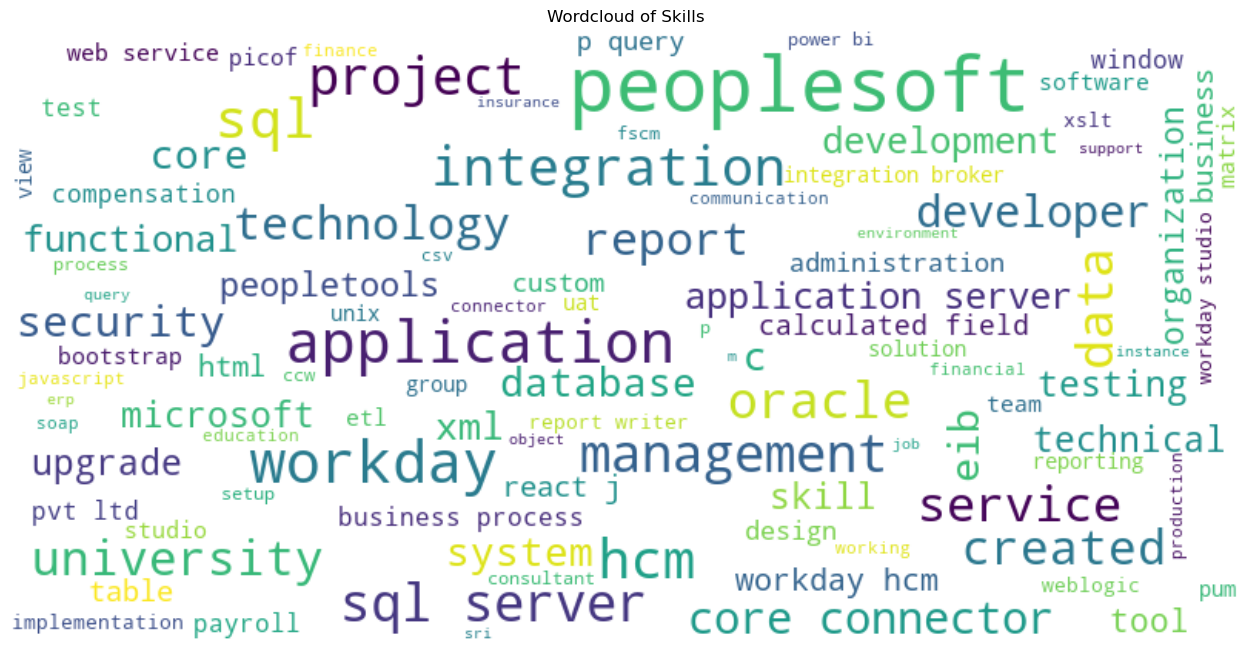

In [76]:
skills_text = ' '.join(df1['skills'].tolist())
wordcloud = WordCloud(width=800, height=400, max_font_size=50, max_words=100, background_color='white').generate(skills_text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Skills')
plt.show()

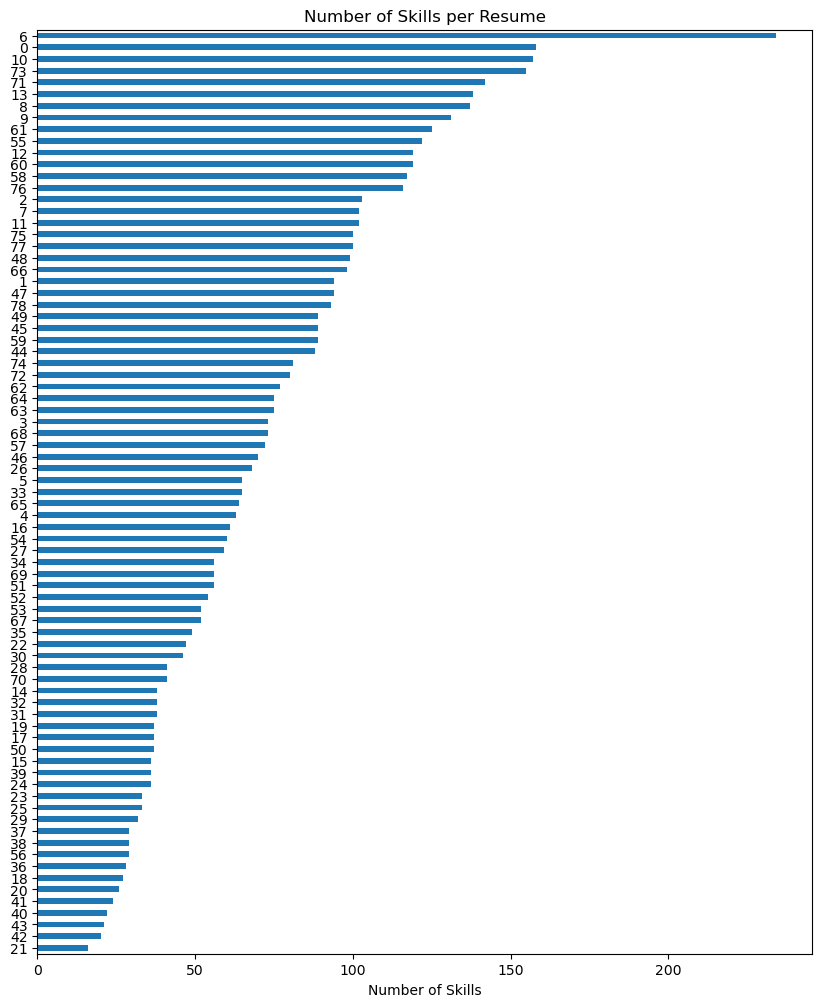

In [77]:
plt.figure(figsize=(10, 12))
df1['skills'].str.split(' ').apply(lambda x: len(x)).sort_values().plot(kind='barh')
plt.title('Number of Skills per Resume')
plt.xlabel('Number of Skills')
plt.show()

In [78]:
df1

,category,Name,skills
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,p application exposure btech electrical electr...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,andhra university state university peoplesoft ...
2,Peoplesoft,Peoplesoft Admin_Gangareddy,oracle peoplesoft update manager rman peopleso...
3,Peoplesoft,Peoplesoft Admin_Murali,oracle aix performing post unix date organizat...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,nvision boarduniversity controlm scheduler gar...
...,...,...,...
74,workday,Sri Krishna S_Hexaware,jntukakinada simple core connector business ob...
75,workday,Srikanth-Hexaware,workday integration core financials integratio...
76,workday,SSKumar_Hexaware,integration broker itc infotech p query ’ engi...
77,workday,Venkateswarlu B_Hexaware,simple international aig woman ’ open business...


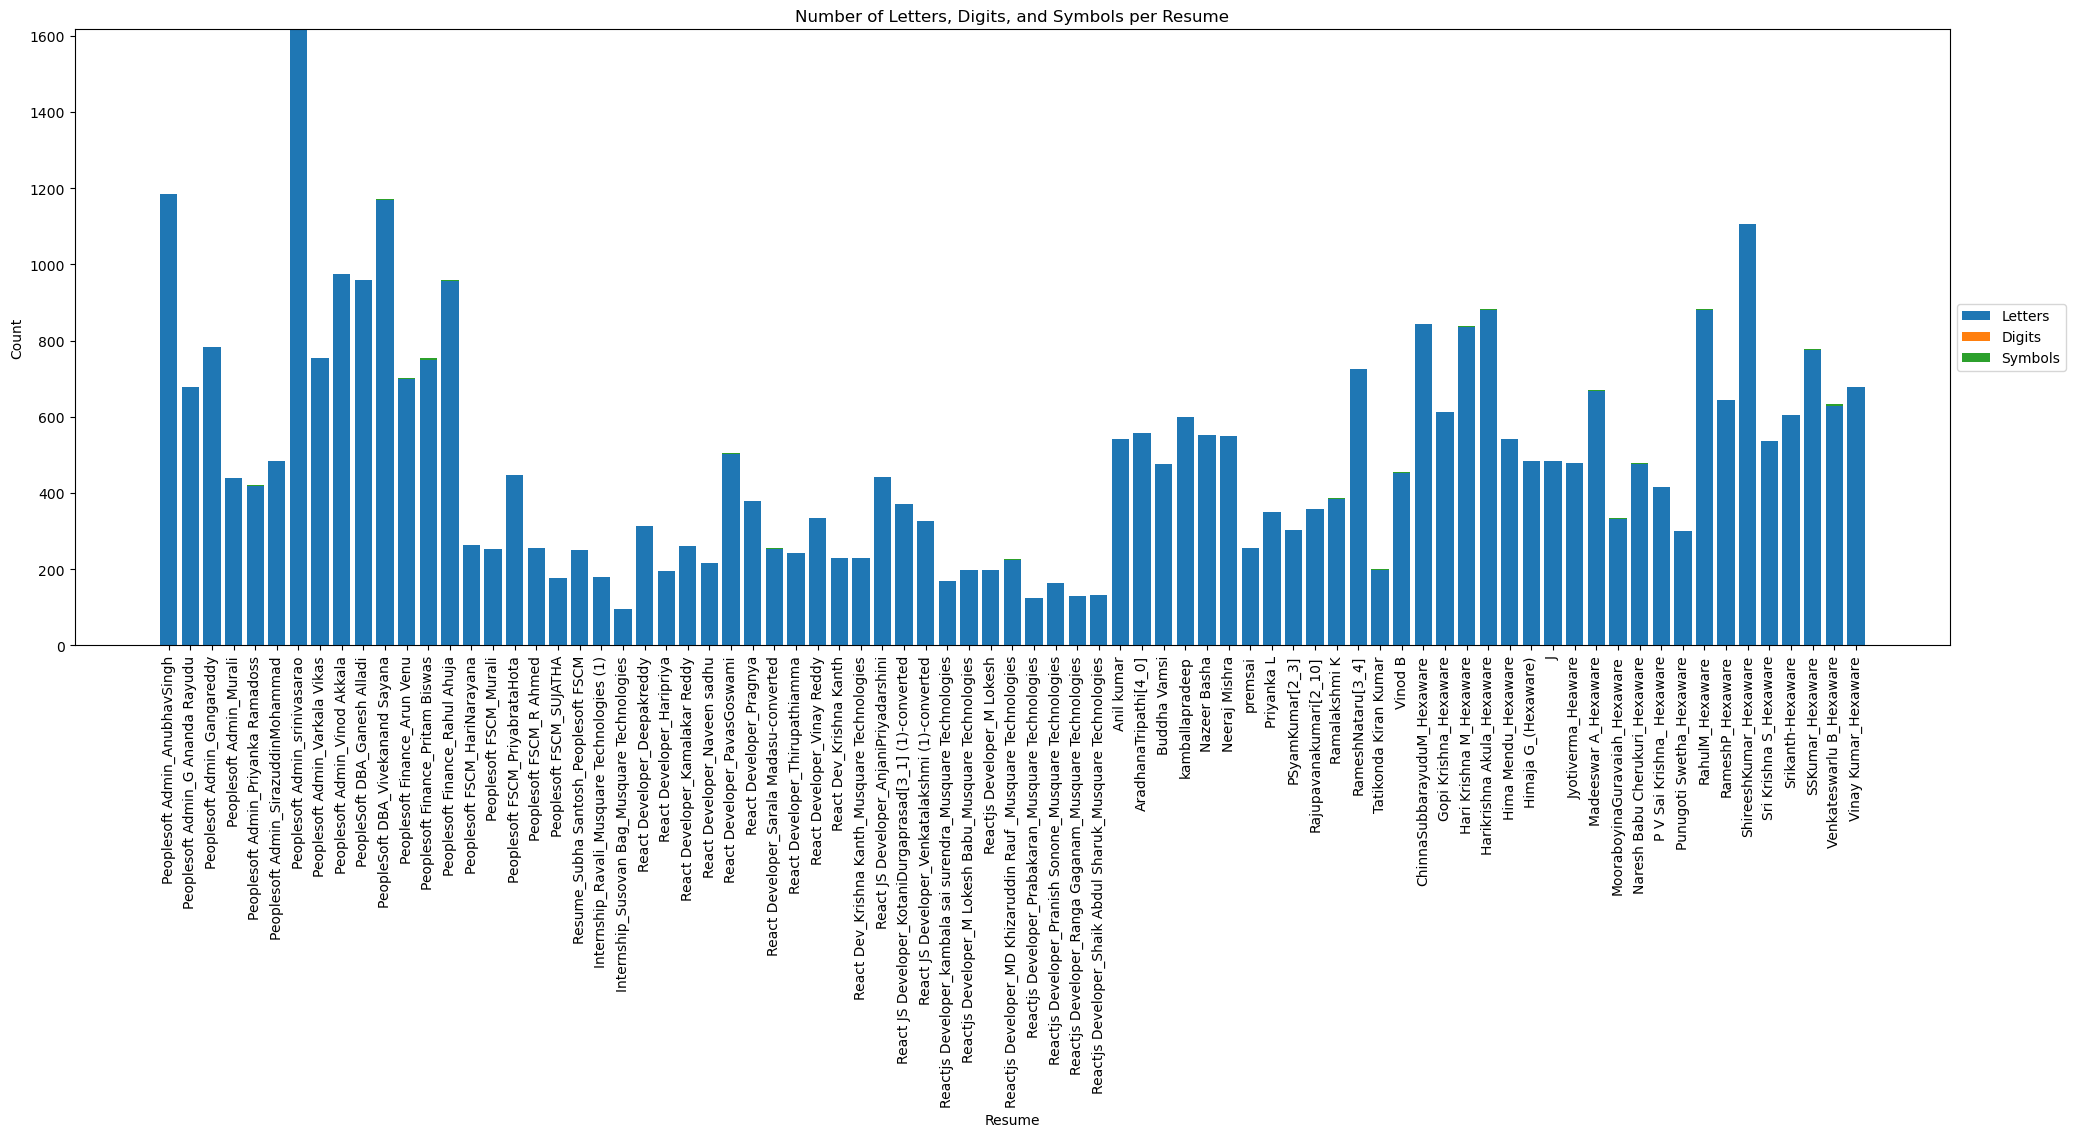

In [79]:
# calculate the number of letters, digits, and symbols in the 'Skills' column
df1['Num_Letters'] = df1['skills'].str.count(r'[a-zA-Z]')
df1['Num_Digits'] = df1['skills'].str.count(r'\d')
df1['Num_Symbols'] = df1['skills'].str.count(r'[^\w\s]')

# create a bar chart of the number of letters, digits, and symbols per resume
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(df1['Name'], df1['Num_Letters'], label='Letters')
ax.bar(df1['Name'], df1['Num_Digits'], bottom=df1['Num_Letters'], label='Digits')
ax.bar(df1['Name'], df1['Num_Symbols'], bottom=df1['Num_Letters']+df1['Num_Digits'], label='Symbols')
plt.xticks(rotation=90)
plt.subplots_adjust(right=2) # adjust left margin
plt.title('Number of Letters, Digits, and Symbols per Resume')
plt.xlabel('Resume')
plt.ylabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [80]:
df1

,category,Name,skills,Num_Letters,Num_Digits,Num_Symbols
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,p application exposure btech electrical electr...,1184,0,0
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,andhra university state university peoplesoft ...,679,0,0
2,Peoplesoft,Peoplesoft Admin_Gangareddy,oracle peoplesoft update manager rman peopleso...,783,0,0
3,Peoplesoft,Peoplesoft Admin_Murali,oracle aix performing post unix date organizat...,439,0,0
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,nvision boarduniversity controlm scheduler gar...,418,0,2
...,...,...,...,...,...,...
74,workday,Sri Krishna S_Hexaware,jntukakinada simple core connector business ob...,536,0,0
75,workday,Srikanth-Hexaware,workday integration core financials integratio...,604,0,1
76,workday,SSKumar_Hexaware,integration broker itc infotech p query ’ engi...,776,0,1
77,workday,Venkateswarlu B_Hexaware,simple international aig woman ’ open business...,628,0,6


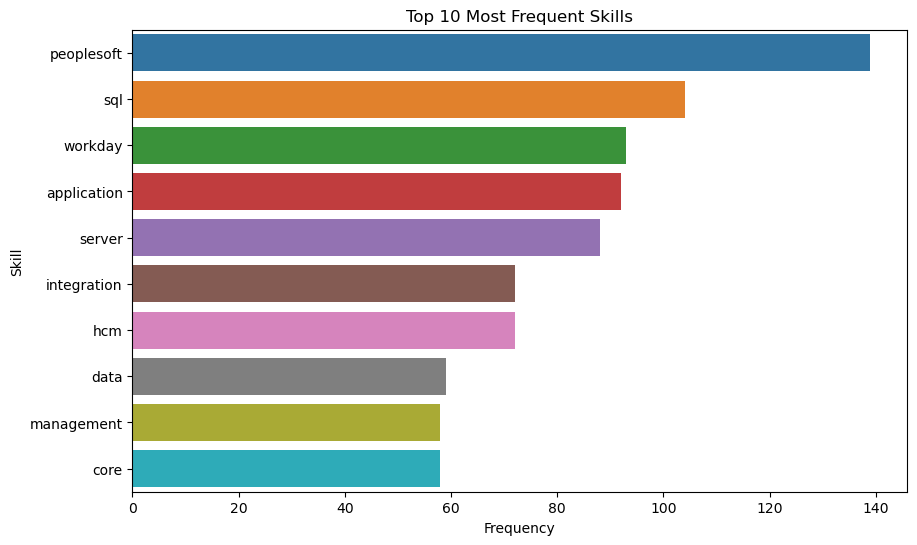

In [81]:
# calculate the number of letters, digits, and symbols in the 'Skills' column
df1['Num_Letters'] = df1['skills'].str.count(r'[a-zA-Z]')
df1['Num_Digits'] = df1['skills'].str.count(r'\d')
df1['Num_Symbols'] = df1['skills'].str.count(r'[^\w\s]')

# count the frequency of each skill
skill_counts = df1['skills'].str.split(' ').explode().str.strip().value_counts()

# create a bar plot of the top 10 most frequent skills
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts[:10], y=skill_counts[:10].index)
plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

In [82]:
df1.skills[5]

'microsoft sql management studio microsoft sql peoplesoft administrator sqldeveloper unix service bangalore tws fin installing oracle tuxedo peoplesoft database setup application designer finance fscm configured report node axa sirazuddin pia interface india peopletools peopletools mvgr college engineering peoplesoft window hcm peopletools communication engg pum solaris voya financial insurance silva training certification applied oracle cloud infrastructure architect associate oracle cloud infrastructure architect professional data mover toad'

In [83]:
df1['y'] = 1

<AxesSubplot:ylabel='y'>

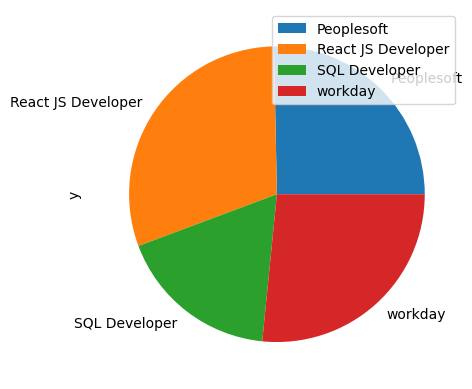

In [84]:
df1.groupby(['category']).sum().plot(kind='pie',y='y' )

In [85]:
df1

,category,Name,skills,Num_Letters,Num_Digits,Num_Symbols,y
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,p application exposure btech electrical electr...,1184,0,0,1
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,andhra university state university peoplesoft ...,679,0,0,1
2,Peoplesoft,Peoplesoft Admin_Gangareddy,oracle peoplesoft update manager rman peopleso...,783,0,0,1
3,Peoplesoft,Peoplesoft Admin_Murali,oracle aix performing post unix date organizat...,439,0,0,1
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,nvision boarduniversity controlm scheduler gar...,418,0,2,1
...,...,...,...,...,...,...,...
74,workday,Sri Krishna S_Hexaware,jntukakinada simple core connector business ob...,536,0,0,1
75,workday,Srikanth-Hexaware,workday integration core financials integratio...,604,0,1,1
76,workday,SSKumar_Hexaware,integration broker itc infotech p query ’ engi...,776,0,1,1
77,workday,Venkateswarlu B_Hexaware,simple international aig woman ’ open business...,628,0,6,1


In [86]:
for i in range(len(df1.skills)):
    df2 = [skills.strip() for skills in df1.skills] # adding all rows to one column

In [87]:
len(df2)

79

In [88]:
text = " ".join(df2)

In [89]:
text_tokens = word_tokenize(text)
text_tokens

['p',
 'application',
 'exposure',
 'btech',
 'electrical',
 'electronic',
 'engineering',
 'aws',
 'resource',
 'integration',
 'broker',
 'github',
 'managing',
 'peoplesoft',
 'hcm',
 'people',
 'tool',
 'technicaldevelopers',
 'imported',
 'self',
 'signed',
 'certificate',
 'hrms',
 'application',
 'server',
 'peopletools',
 'pum',
 'central',
 'prod',
 'working',
 'ansible',
 'github',
 'core',
 'competency',
 'implemented',
 'peoplesoft',
 'interaction',
 'hub',
 'peoplesoft',
 'application',
 'database',
 'admin',
 'security',
 'team',
 'installed',
 'configured',
 's',
 'dev',
 'sourcetarget',
 'roleproject',
 'peoplesoft',
 'update',
 'peopletools',
 'upgrade',
 'job',
 'peopletools',
 'upgrade',
 'peopletools',
 'shell',
 'script',
 'window',
 'hcm',
 'working',
 'vulnerability',
 'hrms',
 'instance',
 'upgrade',
 'hcm',
 'application',
 'upgrade',
 'peoplesoft',
 'administration',
 'shell',
 'scripting',
 'application',
 'secure',
 'enterprise',
 'search',
 'working',
 'kno

In [90]:
len(text_tokens)

5743

In [91]:
text1 = pd.DataFrame(data=text_tokens,columns=['text'])

In [92]:
text1['y'] = 1

In [93]:
text1

,text,y
0,p,1
1,application,1
2,exposure,1
3,btech,1
4,electrical,1
...,...,...
5738,workday,1
5739,workday,1
5740,hcm,1
5741,supervisory,1


In [94]:
#text1.groupby(['text']).sum().plot(kind='pie',y='y' )

In [95]:
df3 = []
for i in range(len(df.skills)):
    df3 = df3 + df.skills[i]

In [96]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()
lemmas = []
for token in df3:
    lemmas.append(Lemmatizer.lemmatize(token))

In [97]:
df3 = pd.DataFrame(data=df3,columns = ['data'])

In [98]:
df3['y'] = 1

In [99]:
df3

,data,y
0,ps applications exposure,1
1,btech in electrical electronic engineering,1
2,aws resources,1
3,integration broker,1
4,github managing peoplesoft hcm,1
...,...,...
3001,supervisory organization,1
3002,eib,1
3003,workday,1
3004,workday hcm,1


In [100]:
#df3.groupby(['data']).sum().plot(kind='pie',y='y' )

In [101]:
df

,category,Name,skills
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,"[ps applications exposure, btech in electrical..."
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,"[andhra university, state university, peopleso..."
2,Peoplesoft,Peoplesoft Admin_Gangareddy,"[oracle, peoplesoft update manager, rman, peop..."
3,Peoplesoft,Peoplesoft Admin_Murali,"[oracle, aix, performing post, unix, dates org..."
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,"[nvision, boarduniversity, controlm scheduler,..."
...,...,...,...
74,workday,Sri Krishna S_Hexaware,"[jntukakinada, simple, core connectors, busine..."
75,workday,Srikanth-Hexaware,"[workday integration, core financials integrat..."
76,workday,SSKumar_Hexaware,"[integration broker, itc infotech, ps query ’ ..."
77,workday,Venkateswarlu B_Hexaware,"[simple, international, aig women ’ s open, bu..."


In [102]:
import sweetviz
my_report = sweetviz.analyze(df1)

                                             |                                             | [  0%]   00:00 ->…

In [103]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [104]:
'''
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df.skills[0])
x

pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(10)

vectorizer.vocabulary_
'''

'\n# Feature extraction\nfrom sklearn.feature_extraction.text import CountVectorizer\nvectorizer = CountVectorizer()\nx = vectorizer.fit_transform(df.skills[0])\nx\n\npd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(10)\n\nvectorizer.vocabulary_\n'

## Feature Extraction

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [106]:
x = df1['skills']
y = df1['category']

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True)
word_vectorizer.fit(x)
x = word_vectorizer.transform(x)

In [107]:
x

<79x1424 sparse matrix of type '<class 'numpy.float64'>'
	with 4166 stored elements in Compressed Sparse Row format>

- converting the target variable to numbers 

In [108]:
'''from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)'''

'from sklearn.preprocessing import LabelEncoder\nLE = LabelEncoder()\ny = LE.fit_transform(y)'

# Data Partition

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.20, shuffle = True, stratify=y)
x_train.shape, x_test.shape

((63, 1424), (16, 1424))

# Model Fitting

## naive_bayes

In [110]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
y_pred_train = NB.predict(x_train)
y_pred_test = NB.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix

print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a11 = accuracy_score(y_train, y_pred_train)
a12 =accuracy_score(y_test, y_pred_test)
r11 = recall_score(y_train, y_pred_train,average = 'macro')
r12 = recall_score(y_test, y_pred_test,average = 'macro')
p11 = precision_score(y_train, y_pred_train,average = 'macro')
p12 = precision_score(y_test, y_pred_test,average = 'macro')
f11 = f1_score(y_train, y_pred_train,average = 'macro')
f12 = f1_score(y_test, y_pred_test,average = 'macro')
m1 = 'naive_bayes'

Train Accuracy : 1.0
Test accuracy :  0.8125
Train recall score is  1.0
Test recall score is  0.7916666666666666
Train precision score : 1.0
Test precision score : 0.8785714285714286
Train f1 score is  1.0
Test f1 score is  0.7972222222222222
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[2 1 0 1]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


## KNN 

In [111]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5,p=2)
Knn.fit(x_train, y_train)
y_pred_train = Knn.predict(x_train)
y_pred_test = Knn.predict(x_test)
from sklearn.metrics import accuracy_score

print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a21 = accuracy_score(y_train, y_pred_train)
a22 =accuracy_score(y_test, y_pred_test)
r21 = recall_score(y_train, y_pred_train,average = 'macro')
r22 = recall_score(y_test, y_pred_test,average = 'macro')
p21 = precision_score(y_train, y_pred_train,average = 'macro')
p22 = precision_score(y_test, y_pred_test,average = 'macro')
f21 = f1_score(y_train, y_pred_train,average = 'macro')
f22 = f1_score(y_test, y_pred_test,average = 'macro')
m2 = 'KNN'

Train Accuracy : 0.9523809523809523
Test accuracy :  0.9375
Train recall score is  0.9484898325358851
Test recall score is  0.9375
Train precision score : 0.9605263157894737
Test precision score : 0.95
Train f1 score is  0.9529839383404748
Test f1 score is  0.9365079365079365
Train confusion matrix : 
 [[15  0  0  1]
 [ 0 18  0  1]
 [ 0  1 10  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[3 0 0 1]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## LogisticRegression

In [112]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)
from sklearn.metrics import accuracy_score

print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a31 = accuracy_score(y_train, y_pred_train)
a32 =accuracy_score(y_test, y_pred_test)
r31 = recall_score(y_train, y_pred_train,average = 'macro')
r32 = recall_score(y_test, y_pred_test,average = 'macro')
p31 = precision_score(y_train, y_pred_train,average = 'macro')
p32 = precision_score(y_test, y_pred_test,average = 'macro')
f31 = f1_score(y_train, y_pred_train,average = 'macro')
f32 = f1_score(y_test, y_pred_test,average = 'macro')
m3 = 'LogisticRegression'

Train Accuracy : 1.0
Test accuracy :  0.875
Train recall score is  1.0
Test recall score is  0.8541666666666666
Train precision score : 1.0
Test precision score : 0.9285714285714286
Train f1 score is  1.0
Test f1 score is  0.8726190476190476
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[3 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


## RandomForestClassifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features=14,max_samples=0.8)
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)
from sklearn.metrics import accuracy_score

print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a41 = accuracy_score(y_train, y_pred_train)
a42 =accuracy_score(y_test, y_pred_test)
r41 = recall_score(y_train, y_pred_train,average = 'macro')
r42 = recall_score(y_test, y_pred_test,average = 'macro')
p41 = precision_score(y_train, y_pred_train,average = 'macro')
p42 = precision_score(y_test, y_pred_test,average = 'macro')
f41 = f1_score(y_train, y_pred_train,average = 'macro')
f42 = f1_score(y_test, y_pred_test,average = 'macro')
m4 = 'RandomForest'

Train Accuracy : 1.0
Test accuracy :  0.875
Train recall score is  1.0
Test recall score is  0.875
Train precision score : 1.0
Test precision score : 0.9285714285714286
Train f1 score is  1.0
Test f1 score is  0.875
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[2 2 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


## Support Vector Machine

In [114]:
from sklearn.svm import SVC
SVC = SVC(kernel="rbf",C=2)
SVC.fit(x_train, y_train)
y_pred_train = SVC.predict(x_train)
y_pred_test = SVC.predict(x_test)
from sklearn.metrics import accuracy_score

print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a51 = accuracy_score(y_train, y_pred_train)
a52 =accuracy_score(y_test, y_pred_test)
r51 = recall_score(y_train, y_pred_train,average = 'macro')
r52 = recall_score(y_test, y_pred_test,average = 'macro')
p51 = precision_score(y_train, y_pred_train,average = 'macro')
p52 = precision_score(y_test, y_pred_test,average = 'macro')
f51 = f1_score(y_train, y_pred_train,average = 'macro')
f52 = f1_score(y_test, y_pred_test,average = 'macro')
m5 = 'SVM-(rbf)'

Train Accuracy : 1.0
Test accuracy :  0.8125
Train recall score is  1.0
Test recall score is  0.7916666666666666
Train precision score : 1.0
Test precision score : 0.90625
Train f1 score is  1.0
Test f1 score is  0.808974358974359
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[2 2 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [115]:
from sklearn.svm import SVC
SVC = SVC(kernel="linear",C=2)
SVC.fit(x_train, y_train)
y_pred_train = SVC.predict(x_train)
y_pred_test = SVC.predict(x_test)
from sklearn.metrics import accuracy_score

print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a61 = accuracy_score(y_train, y_pred_train)
a62 =accuracy_score(y_test, y_pred_test)
r61 = recall_score(y_train, y_pred_train,average = 'macro')
r62 = recall_score(y_test, y_pred_test,average = 'macro')
p61 = precision_score(y_train, y_pred_train,average = 'macro')
p62 = precision_score(y_test, y_pred_test,average = 'macro')
f61 = f1_score(y_train, y_pred_train,average = 'macro')
f62 = f1_score(y_test, y_pred_test,average = 'macro')
m6 = 'SVM-(Linear)'

Train Accuracy : 1.0
Test accuracy :  1.0
Train recall score is  1.0
Test recall score is  1.0
Train precision score : 1.0
Test precision score : 1.0
Train f1 score is  1.0
Test f1 score is  1.0
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


## Bagging

In [116]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(max_features=0.9,n_estimators=10,max_samples=0.8)
Bag.fit(x_train,y_train)
y_pred_train = Bag.predict(x_train)
y_pred_test = Bag.predict(x_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a71 = accuracy_score(y_train, y_pred_train)
a72 =accuracy_score(y_test, y_pred_test)
r71 = recall_score(y_train, y_pred_train,average = 'macro')
r72 = recall_score(y_test, y_pred_test,average = 'macro')
p71 = precision_score(y_train, y_pred_train,average = 'macro')
p72 = precision_score(y_test, y_pred_test,average = 'macro')
f71 = f1_score(y_train, y_pred_train,average = 'macro')
f72 = f1_score(y_test, y_pred_test,average = 'macro')
m7 = 'Bagging'

Train Accuracy : 1.0
Test accuracy :  0.9375
Train recall score is  1.0
Test recall score is  0.9375
Train precision score : 1.0
Test precision score : 0.9583333333333334
Train f1 score is  1.0
Test f1 score is  0.9415584415584416
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 1 0 3]]


##  GradientBoosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(learning_rate=0.01,n_estimators=10)
GBC.fit(x_train,y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test = GBC.predict(x_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a81 = accuracy_score(y_train, y_pred_train)
a82 =accuracy_score(y_test, y_pred_test)
r81 = recall_score(y_train, y_pred_train,average = 'macro')
r82 = recall_score(y_test, y_pred_test,average = 'macro')
p81 = precision_score(y_train, y_pred_train,average = 'macro')
p82 = precision_score(y_test, y_pred_test,average = 'macro')
f81 = f1_score(y_train, y_pred_train,average = 'macro')
f82 = f1_score(y_test, y_pred_test,average = 'macro')
m8 = 'GradientBoosting'

Train Accuracy : 0.8253968253968254
Test accuracy :  0.75
Train recall score is  0.75
Test recall score is  0.6875
Train precision score : 0.6583333333333333
Test precision score : 0.6388888888888888
Train f1 score is  0.6938775510204082
Test f1 score is  0.6428571428571429
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0 11  0  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 3 0 0]
 [0 1 0 3]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

## AdaBoost 

In [118]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(learning_rate=0.02,n_estimators=10)
ABC.fit(x_train,y_train)
y_pred_train = ABC.predict(x_train)
y_pred_test = ABC.predict(x_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a91 = accuracy_score(y_train, y_pred_train)
a92 =accuracy_score(y_test, y_pred_test)
r91 = recall_score(y_train, y_pred_train,average = 'macro')
r92 = recall_score(y_test, y_pred_test,average = 'macro')
p91 = precision_score(y_train, y_pred_train,average = 'macro')
p92 = precision_score(y_test, y_pred_test,average = 'macro')
f91 = f1_score(y_train, y_pred_train,average = 'macro')
f92 = f1_score(y_test, y_pred_test,average = 'macro')
m9 = 'AdaBoost'

Train Accuracy : 0.9841269841269841
Test accuracy :  1.0
Train recall score is  0.9772727272727273
Test recall score is  1.0
Train precision score : 0.9875
Test precision score : 1.0
Train f1 score is  0.9816849816849818
Test f1 score is  1.0
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  1 10  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


## DecisionTree

- Gini

In [119]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',max_depth=6,max_features=0.7)
DT.fit(x_train,y_train)
y_pred_train = DT.predict(x_train)
y_pred_test = DT.predict(x_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a101 = accuracy_score(y_train, y_pred_train)
a102 =accuracy_score(y_test, y_pred_test)
r101 = recall_score(y_train, y_pred_train,average = 'macro')
r102 = recall_score(y_test, y_pred_test,average = 'macro')
p101 = precision_score(y_train, y_pred_train,average = 'macro')
p102 = precision_score(y_test, y_pred_test,average = 'macro')
f101 = f1_score(y_train, y_pred_train,average = 'macro')
f102 = f1_score(y_test, y_pred_test,average = 'macro')
m10 = 'DecisionTree-(gini)'

Train Accuracy : 1.0
Test accuracy :  1.0
Train recall score is  1.0
Test recall score is  1.0
Train precision score : 1.0
Test precision score : 1.0
Train f1 score is  1.0
Test f1 score is  1.0
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


- entropy

In [120]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=0.7)
DT.fit(x_train,y_train)
y_pred_train = DT.predict(x_train)
y_pred_test = DT.predict(x_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))
a111 = accuracy_score(y_train, y_pred_train)
a112 =accuracy_score(y_test, y_pred_test)
r111 = recall_score(y_train, y_pred_train,average = 'macro')
r112 = recall_score(y_test, y_pred_test,average = 'macro')
p111 = precision_score(y_train, y_pred_train,average = 'macro')
p112 = precision_score(y_test, y_pred_test,average = 'macro')
f111 = f1_score(y_train, y_pred_train,average = 'macro')
f112 = f1_score(y_test, y_pred_test,average = 'macro')
m11 = 'DecisionTree-(entropy)'

Train Accuracy : 1.0
Test accuracy :  0.9375
Train recall score is  1.0
Test recall score is  0.9166666666666666
Train precision score : 1.0
Test precision score : 0.9583333333333334
Train f1 score is  1.0
Test f1 score is  0.9272727272727272
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [121]:
model = {'model':[m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11],
         "train accuracy":[a11,a21,a31,a41,a51,a61,a71,a81,a91,a101,a111],'test accuracy':[a12,a22,a32,a42,a52,a62,a72,a82,a92,a102,a112],
         'train recall':[r11,r21,r31,r41,r51,r61,r71,r81,r91,r101,r111],"test recall":[r12,r22,r32,r42,r52,r62,r72,r82,r92,r102,r112],
         'train precision':[p11,p21,p31,p41,p51,p61,p71,p81,p91,p101,p111],"test precision":[p12,p22,p32,p42,p52,p62,p72,p82,p92,p102,p112],
         'tain f1_score':[p11,p21,p31,p41,p51,p61,p71,p81,p91,p101,p111],'test f1_score':[f12,f22,f32,f42,f52,f62,f72,f82,f92,f102,f112]}

In [122]:
model = pd.DataFrame(model)

In [123]:
model

,model,train accuracy,test accuracy,train recall,test recall,train precision,test precision,tain f1_score,test f1_score
0,naive_bayes,1.000000,0.8125,1.000000,0.791667,1.000000,0.878571,1.000000,0.797222
1,KNN,0.952381,0.9375,0.948490,0.937500,0.960526,0.950000,0.960526,0.936508
2,LogisticRegression,1.000000,0.8750,1.000000,0.854167,1.000000,0.928571,1.000000,0.872619
3,RandomForest,1.000000,0.8750,1.000000,0.875000,1.000000,0.928571,1.000000,0.875000
4,SVM-(rbf),1.000000,0.8125,1.000000,0.791667,1.000000,0.906250,1.000000,0.808974
5,SVM-(Linear),1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Bagging,1.000000,0.9375,1.000000,0.937500,1.000000,0.958333,1.000000,0.941558
7,GradientBoosting,0.825397,0.7500,0.750000,0.687500,0.658333,0.638889,0.658333,0.642857
8,AdaBoost,0.984127,1.0000,0.977273,1.000000,0.987500,1.000000,0.987500,1.000000
9,DecisionTree-(gini),1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# -------------------------------------------------

In [124]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True)
word_vectorizer.fit(df1['skills'])
e = word_vectorizer.transform([df1['skills'][0]])

In [125]:
pred1 = Knn.predict(e)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [126]:
pred1

array(['Peoplesoft'], dtype=object)

In [127]:
import pickle

In [128]:
pickle_out = open("modelNLP.pkl",'wb')
pickle.dump(Knn,pickle_out)
pickle_out.close()

In [129]:
pickle_in = open("modelNLP.pkl","rb")